## Analysis of Palomar TripleSpec Spectrum of PKS 1017 for Chris
G. R. Tremblay (Yale University)

## 1. Reduction

Reduction of the data was performed using the `idl` tool `xspextool v4.0`. 

* **Wavelength Calibration**: I listed all of the A nod positions 

** Dark Frames **:
* `tspec10021.fits` through `tspec1030.fits`, contiguous


** Lamp Flats **:
* `tspec1011.fits` through `tspec1020.fits`, contiguous

** Science A Position, 300sec each **

`tspec[#].fits`, where # = 
* `1068`, 
* `1071`, 
* `1072`, 
* `1075`, 
* `1076`, 
* `1079`, 
* `1080`, 
* `1083`

** Science B Position, 300sec each **

`tspec[#].fits`, where # = 
* `1069`, 
* `1070`, 
* `1073`, 
* `1074`, 
* `1077`, 
* `1078`, 
* `1081`, 
* `1082`

### Step 1: Create a Master Dark Frame

In the `Combine Images` panel, I input the 

<img src="dark.png">

This created `master_dark.fits` in the `cal/` directory. 

### Step 2: Create a master Flat Frame

In the `Cals` panel, I did this: 

<img src="flat.png">

The flat construction process includes finding the edges of each order, fitting a 2-D surface to each order, replacing bad pixels, and normalizing the flat by the 2-D surface. 

### Step 3: Wavelength Calibration

In the `Cals` panel, I input a list of all `A`-position science exposures, because it's probably best to list several frames at one nod position to increase S/N on the sky lines. 

<img src="wave.png">


### Step 4: Making master science frames

In the `combine images` panel I created  master science frames for nod position `A` and `B` with a Median (MAD) combine

<img src="science_a.png"> <img src="science_b.png">

Here's a quick subtraction I made in IRAF. The object's continuum is clearly detected in order 4 and 5, and I see two emission lines.

<img src="sub.png">




In [1]:
import sys
import os
import glob

import numpy as np

from astropy.io import ascii
from astropy.io import fits
from astropy.table import QTable

from astropy.cosmology import FlatLambdaCDM

import astropy.units as u

import pyspeckit

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache using fc-list. This may take a moment.


In [2]:
lines = {'OI6300': 6302.046,
         'SIII6313': 6313.8,
         'OI6363': 6365.536,
         'NII6548': 6549.85,
         'HAlpha': 6564.61,
         'HBeta': 4862.69,
         'NII6584': 6585.28,
         'HeI6678': 6679.99556,
         'SII6716': 6718.29,
         'SII6731': 6732.67,
         'pa20': 8394.71,
         'pa19': 8415.63,
         'pa18': 8440.27,
         'pa17': 8469.59,
         'pa16': 8504.83,
         'pa15': 8547.73,
         'pa14': 8600.75,
         'pa13': 8667.40,
         'pa12': 8752.86,
         'pa11': 8865.32,
         'pa10': 9017.8 ,
         'pa9' : 9232.2 ,
         'HeI7067': 7067.138,
         'HeI7283': 7283.355,
         'ArIII7135': 7137.8,
         'ArIII7751': 7753.2,
         'SIII9071':9071.1,
         'NeII5756':5756.24,
         'HeI5877':5877.3,
         'OIII5008': 5008.24,
         'OII4960': 4960.3,
}

In [3]:
lines['HeI7067']

7067.138

If the source really is around redshift 0.17, then the lines would be at: 


In [4]:

shiftedlines = lines

oneplusz = 1 + 0.17

shiftedlines.update((x, y*oneplusz) for x, y in shiftedlines.items())

shiftedlines


{'ArIII7135': 8351.226,
 'ArIII7751': 9071.243999999999,
 'HAlpha': 7680.593699999999,
 'HBeta': 5689.347299999999,
 'HeI5877': 6876.441,
 'HeI6678': 7815.594805199999,
 'HeI7067': 8268.551459999999,
 'HeI7283': 8521.525349999998,
 'NII6548': 7663.3245,
 'NII6584': 7704.777599999999,
 'NeII5756': 6734.800799999999,
 'OI6300': 7373.39382,
 'OI6363': 7447.677119999999,
 'OII4960': 5803.5509999999995,
 'OIII5008': 5859.640799999999,
 'SII6716': 7860.399299999999,
 'SII6731': 7877.2239,
 'SIII6313': 7387.146,
 'SIII9071': 10613.187,
 'pa10': 10550.826,
 'pa11': 10372.4244,
 'pa12': 10240.8462,
 'pa13': 10140.857999999998,
 'pa14': 10062.877499999999,
 'pa15': 10000.844099999998,
 'pa16': 9950.6511,
 'pa17': 9909.4203,
 'pa18': 9875.1159,
 'pa19': 9846.287099999998,
 'pa20': 9821.810699999998,
 'pa9': 10801.674}

In [5]:
glob.glob('*.fits')

['master_science_spectrum_savitsky.fits',
 'splot_spectrum_from_python.fits',
 'master_science_spectrum_final.fits',
 'master_science_b.fits',
 'master_science_a.fits',
 'pks1017_tspec_spectrum.fits']

### Step 4: Extract the Spectrum

In the `Point Source` panel, set the input images to be `proc/` + `master_science_a.fits, master_science_b.fits`. I also set the master flat fields and full wavecal name. 

I then clicked `Load Image`. This flatfielded the images, subtracted them, and then displayed the difference image. 

*The target is trivially visible by-eye ... looks like a pretty good detection!*

The `Load Image` functionality did not identify any saturated pixels. 

I then clicked `Make Spatial Apertures`, and got this: 

<img src="trace.png">

Clearly the object continuum is detected in all orders (the curve is the median slice across each order). 

I then clicked `N Apertures = 1`, and hit `Find / Store Ap Positions`. 

<img src="guess.png"> <img src="fix.png"> 

Auto-find the apertures ended up screwing up order no. 3 (it chose the negative "shadow" rather than the bright peak). So, insead, I had to click `guess`, type `s` while mousing over each peak, and clicking the left mouse button on each peak after selecting `Order-by-order` in the `Aperture Mode` button at top left. See the `spextool` instruction manual for more information. I then clicked `fix` and then `find/store ap positions`, and the correct aperture positions were set.

It looks like there is enough signal in orders 6,5,4,3 that I'll be able to extract from all. 

I now click `trace objects`, `define apertures`, and run an optimal extraction, after fixing the background (red) extraction region (which previously included the "shadow', which I don't want)

<img src="apertures.png">


After the extraction, I then cleaned the spectrum using `xcleanspec` with both Savitsky-Golay cleaning and a simple Gaussian clean. 

Here's what I get. Note that I really only get signal in orders 5, 4, and 3: 

<img src="final.png">



Make some units & cosmology:

In [6]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [7]:
# Make matplotlib use a prettier set of default settings
plt.style.use('ggplot')

In [8]:
# Find the file
glob.glob('*.fits')


['master_science_spectrum_savitsky.fits',
 'splot_spectrum_from_python.fits',
 'master_science_spectrum_final.fits',
 'master_science_b.fits',
 'master_science_a.fits',
 'pks1017_tspec_spectrum.fits']

### Creating a PySpecKit Spectrum object from this data

In [9]:
final_science_spectrum = "master_science_spectrum_final.fits"
hdulist = fits.open(final_science_spectrum)

In [10]:
header = hdulist[0].header

In [11]:
hdulist[0].data

array([[  1.13042945e+00,   1.13060244e+00,   1.13077542e+00, ...,
          1.85019949e+00,   1.85041555e+00,   1.85063162e+00],
       [  3.96274040e-05,   3.63602784e-05,   2.81516507e-05, ...,
         -1.08074557e-04,  -1.22465147e-04,  -1.23266740e-04],
       [  6.74106923e-03,   6.87655576e-03,   7.02150781e-03, ...,
          6.33067603e-03,   6.67226082e-03,   7.02772076e-03]])

In [12]:
wavelength = hdulist[0].data[0,:]
flux = hdulist[0].data[1,:]
error = hdulist[0].data[2,:]

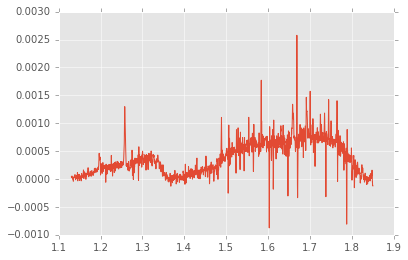

In [13]:
plt.plot(wavelength,flux)

In [14]:
sp = pyspeckit.Spectrum(data=flux, 
                        error=error, 
                        xarr=wavelength, 
                        xarrkwargs={'unit':'micron'}, 
                        unit='DN/s', 
                        header=header)

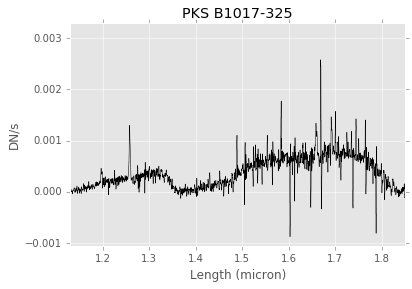

In [15]:
sp.plotter()

In [16]:
#sp.smooth(3.0, 'gaussian')

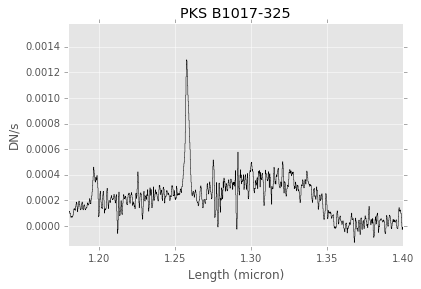

In [17]:
sp.plotter(xmin=1.18, xmax=1.4)

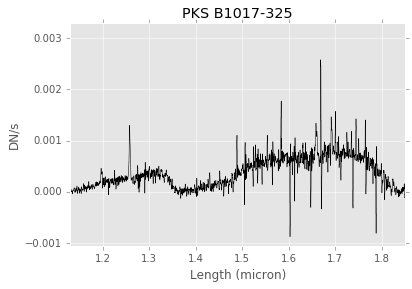

In [18]:
sp.plotter()

In [19]:
#sp.baseline(interactive=False, subtract=True, order=6, highlight_fitregion=True)

## Look at the lines

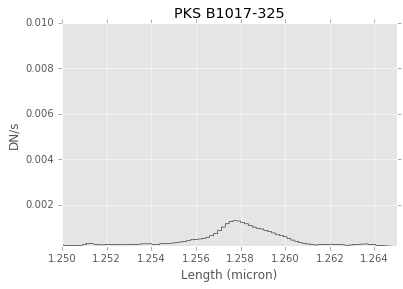

In [27]:
sp.plotter(xmin=1.25, xmax=1.265, ymin=0.0002, ymax=0.01)

In [21]:
sp.specfit(xmin=1.22, xmax=1.265, negamp=False, interactive=False)
sp.specfit.plot_fit()

INFO: Setting xmin,xmax from keywords 1.22,1.265 [pyspeckit.spectrum.interactive]


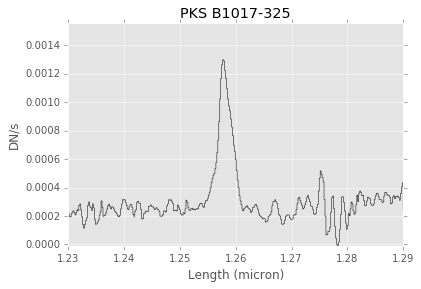

In [22]:
sp.plotter(xmin=1.23,xmax=1.29)


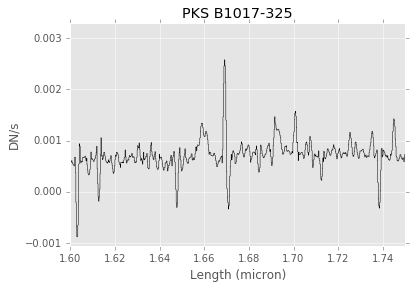

In [23]:
sp.plotter(xmin=1.6,xmax=1.75)

In [24]:
wavelength_micron = wavelength * u.micron
wavelength_micron

<Quantity [ 1.13042945, 1.13060244, 1.13077542,...,  1.85019949,
            1.85041555, 1.85063162] micron>

In [25]:
wavelength_ang = wavelength_micron.to(u.angstrom)
wavelength_ang

<Quantity [ 11304.29450886, 11306.02437421, 11307.75423956,...,
            18501.99485955, 18504.15552882, 18506.3161981 ] Angstrom>

In [26]:
np.savetxt('text_spectrum_from_python.txt',np.c_[wavelength_ang.value, flux], delimiter='\t')

## Lines detected
### 1.1973 $\mu$m, gfwhm = 877 km/s
### 1.4797 $\mu$m, gfwhm = 792.8 km/s

<img src="lines.png">